In [8]:
import pandas as pd
import matplotlib.pyplot as plt

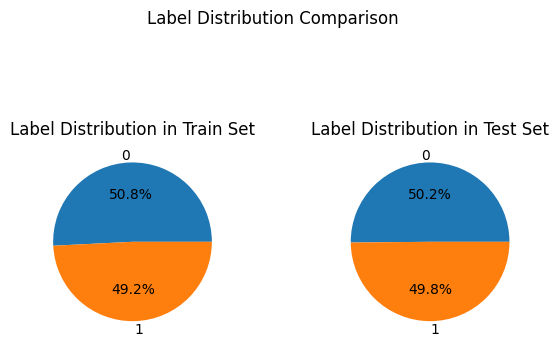

In [9]:
df_train = pd.read_csv('train.csv')
counts_train = df_train['label'].value_counts()

df_test = pd.read_csv('test.csv')
counts_test = df_test['label'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(counts_train, labels=counts_train.index, autopct='%1.1f%%')
ax1.set_title('Label Distribution in Train Set')

ax2.pie(counts_test, labels=counts_test.index, autopct='%1.1f%%')
ax2.set_title('Label Distribution in Test Set')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Label Distribution Comparison')

plt.show()

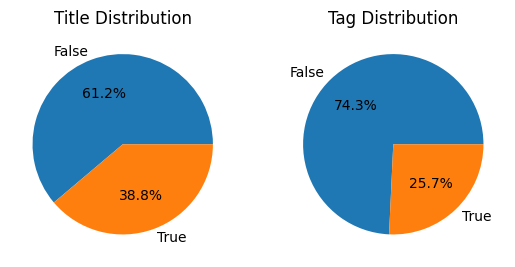

In [10]:
df = pd.read_csv('train.csv')

# 统计title不为[]和为[]的数量
title_counts = df['title'].apply(lambda x: False if x == '[]' else True).value_counts()

plt.subplot(121)
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%')
plt.title('Title Distribution')

tag_counts = df['tag'].apply(lambda x: False if x == '[]' else True).value_counts()

plt.subplot(122)
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%')
plt.title('Tag Distribution')

plt.show()

分析LSTM模型、TextCNN模型和BERT模型在测试集上的表现

LSTM

错误样本中标签为0和1的分布

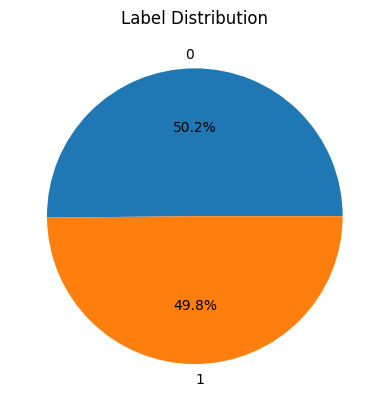

In [15]:
df_lstm = pd.read_csv('LSTMRes.csv')
counts_lstm = df_lstm['label'].value_counts()

plt.pie(counts_lstm, labels=counts_lstm.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

以下是对错误样例的分类。分类标准制定如下：
| 类型 | 标签 |
| ---- | ---- |
| 具有讽刺、隐喻意味 | 0 |
| 文本质量低 | 1 |
| 缺少需要的额外信息 | 2 |
| 文本具有情感引导性 | 3 |
| 其他 | 4 |

以下是所有错误样例的type占比

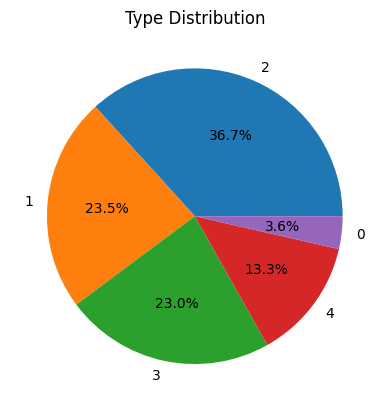

In [40]:
df = pd.read_csv('LSTMRes_analysis.csv')

type_counts = df['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Type Distribution')

plt.show()

以下是错误样例中，本来为假新闻，但判断为真新闻的type占比，以及本来为真新闻，但判断为假新闻的type占比

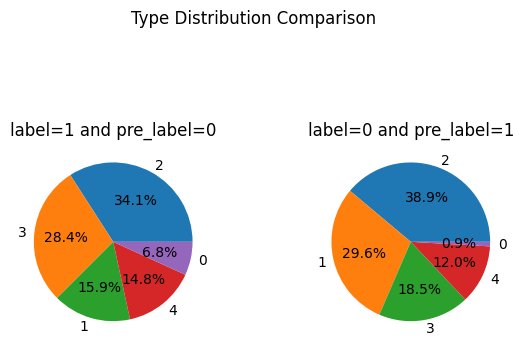

In [41]:
df_filtered1 = df[(df['label'] == 1) & (df['pre_label'] == 0)]

type_counts1 = df_filtered1['type'].value_counts()

df_filtered2 = df[(df['label'] == 0) & (df['pre_label'] == 1)]

type_counts2 = df_filtered2['type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(type_counts1, labels=type_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(type_counts2, labels=type_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Type Distribution Comparison')

plt.show()

是否含有title

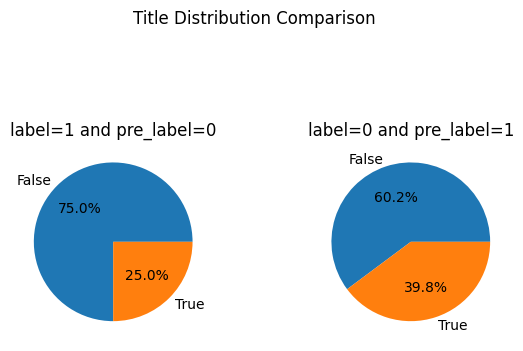

In [42]:
title_counts1 = df_filtered1['title'].apply(lambda x: False if x == '[ ]' else True).value_counts()

title_counts2 = df_filtered2['title'].apply(lambda x: False if x == '[ ]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(title_counts1, labels=title_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(title_counts2, labels=title_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Title Distribution Comparison')

plt.show()

是否含有tag

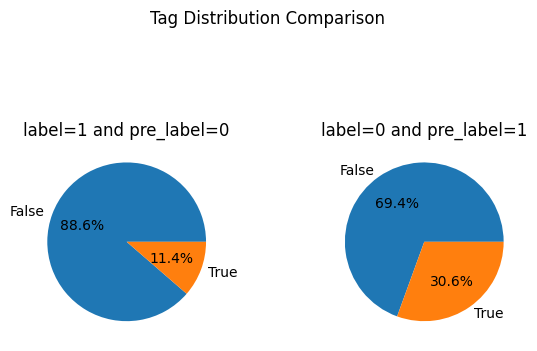

In [43]:
tag_counts1 = df_filtered1['tag'].apply(lambda x: False if x == '[ ]' else True).value_counts()

tag_counts2 = df_filtered2['tag'].apply(lambda x: False if x == '[ ]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(tag_counts1, labels=tag_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(tag_counts2, labels=tag_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Tag Distribution Comparison')

plt.show()

TextCNN

以下是所有错误样例的type占比

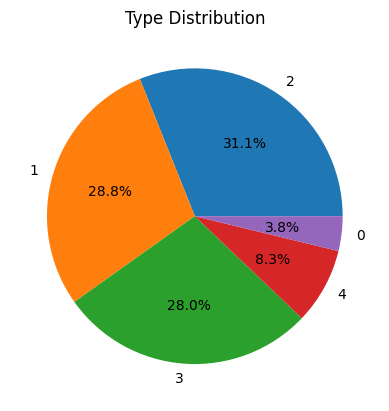

In [35]:
df = pd.read_csv('TextCNNRes_analysis.csv')

type_counts = df['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Type Distribution')

plt.show()

以下是错误样例中，本来为假新闻，但判断为真新闻的type占比，以及本来为真新闻，但判断为假新闻的type占比

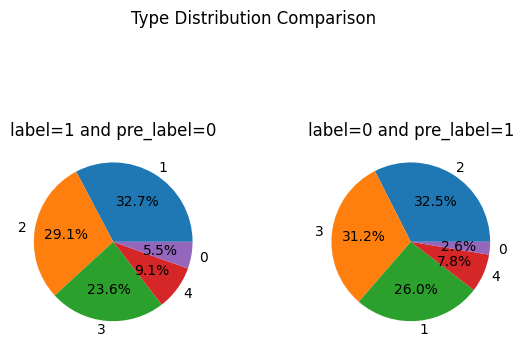

In [36]:
df_filtered1 = df[(df['label'] == 1) & (df['pre_label'] == 0)]

type_counts1 = df_filtered1['type'].value_counts()

df_filtered2 = df[(df['label'] == 0) & (df['pre_label'] == 1)]

type_counts2 = df_filtered2['type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(type_counts1, labels=type_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(type_counts2, labels=type_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Type Distribution Comparison')

plt.show()

是否含有title

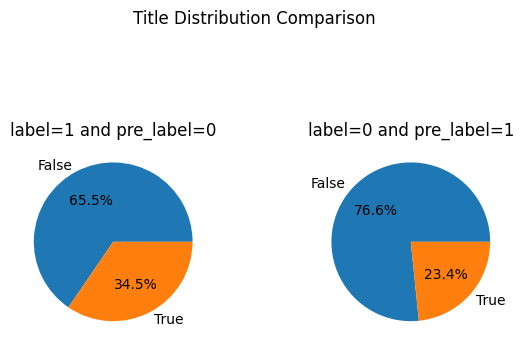

In [37]:
title_counts1 = df_filtered1['title'].apply(lambda x: False if x == '[ ]' else True).value_counts()

title_counts2 = df_filtered2['title'].apply(lambda x: False if x == '[ ]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(title_counts1, labels=title_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(title_counts2, labels=title_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Title Distribution Comparison')

plt.show()

是否含有tag

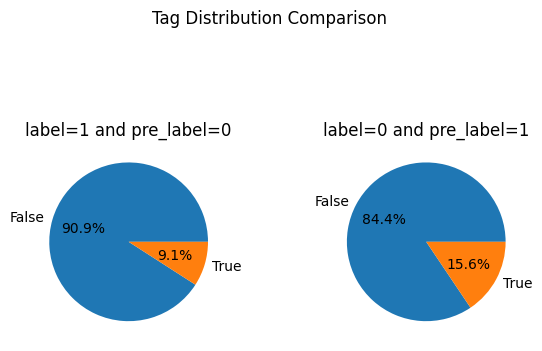

In [38]:
tag_counts1 = df_filtered1['tag'].apply(lambda x: False if x == '[ ]' else True).value_counts()

tag_counts2 = df_filtered2['tag'].apply(lambda x: False if x == '[ ]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(tag_counts1, labels=tag_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(tag_counts2, labels=tag_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Tag Distribution Comparison')

plt.show()

BERT

以下是所有错误样例的type占比


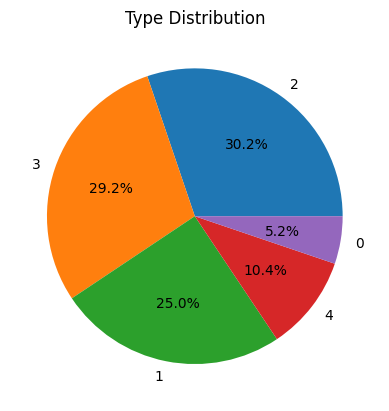

In [44]:
df = pd.read_csv('BERTRes_analysis.csv')

type_counts = df['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Type Distribution')

plt.show()

以下是错误样例中，本来为假新闻，但判断为真新闻的type占比，以及本来为真新闻，但判断为假新闻的type占比

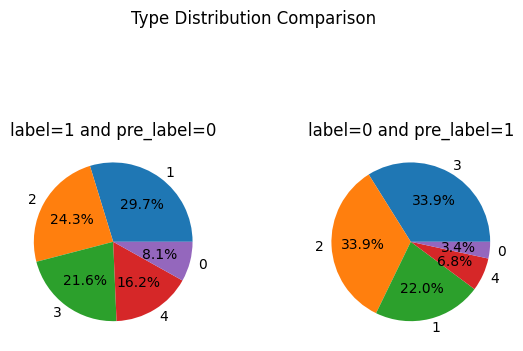

In [45]:
df_filtered1 = df[(df['label'] == 1) & (df['pre_label'] == 0)]

type_counts1 = df_filtered1['type'].value_counts()

df_filtered2 = df[(df['label'] == 0) & (df['pre_label'] == 1)]

type_counts2 = df_filtered2['type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(type_counts1, labels=type_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(type_counts2, labels=type_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Type Distribution Comparison')

plt.show()

是否含有title

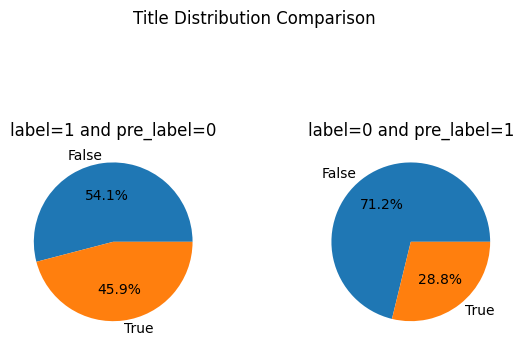

In [47]:
title_counts1 = df_filtered1['title'].apply(lambda x: False if x == '[]' else True).value_counts()

title_counts2 = df_filtered2['title'].apply(lambda x: False if x == '[]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(title_counts1, labels=title_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(title_counts2, labels=title_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Title Distribution Comparison')

plt.show()

是否含有tag

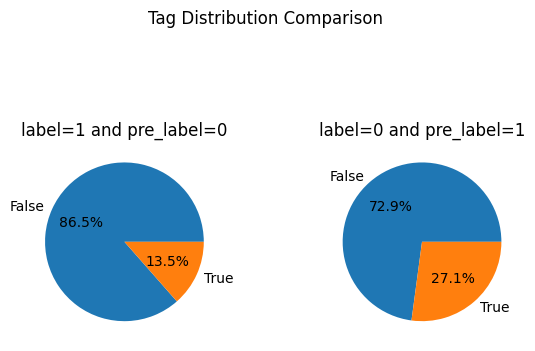

In [48]:
tag_counts1 = df_filtered1['tag'].apply(lambda x: False if x == '[]' else True).value_counts()

tag_counts2 = df_filtered2['tag'].apply(lambda x: False if x == '[]' else True).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(tag_counts1, labels=tag_counts1.index, autopct='%1.1f%%')
ax1.set_title('label=1 and pre_label=0')

ax2.pie(tag_counts2, labels=tag_counts2.index, autopct='%1.1f%%')
ax2.set_title('label=0 and pre_label=1')

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Tag Distribution Comparison')

plt.show()